In [80]:
%load_ext autoreload
%autoreload 2

from autoscript_sdb_microscope_client.structures import AdornedImage

import matplotlib.pyplot as plt
import numpy as np
from liftout import utils
from liftout.fibsem import acquire, milling, movement
from liftout.fibsem import utils as fibsem_utils
from liftout.fibsem.acquire import BeamType, ImageSettings, GammaSettings
import scipy.ndimage as ndi
settings = utils.load_config(r"C:\Users\Admin\Github\autoliftout\liftout\protocol_liftout.yml")
microscope = fibsem_utils.initialise_fibsem(ip_address=settings["system"]["ip_address"])
image_settings = ImageSettings(
    resolution = settings["imaging"]["resolution"],
    dwell_time = settings["imaging"]["dwell_time"],
    hfw = settings["imaging"]["horizontal_field_width"],
    autocontrast = True,
    beam_type = BeamType.ION,
    gamma = GammaSettings(
        enabled = settings["gamma"]["correction"],
        min_gamma = settings["gamma"]["min_gamma"],
        max_gamma = settings["gamma"]["max_gamma"],
        scale_factor= settings["gamma"]["scale_factor"],
        threshold = settings["gamma"]["threshold"]
    ),
    save = False,
    label = "test",
    save_path=""
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Client connecting to [10.0.0.1:7520]...
Client connected to [10.0.0.1:7520]


In [81]:
import glob
from pprint import pprint

folder = "iter1"
filenames = glob.glob(f"may26/{folder}/*.tif")
pprint(filenames)

['may26/iter1\\polish_lamella_crosscorrelation_ref_ib.tif',
 'may26/iter1\\polish_lamella_tilt_-0.02_aligned_ib.tif',
 'may26/iter1\\polish_lamella_tilt_-0.02_stage_1_ib.tif',
 'may26/iter1\\polish_lamella_tilt_-0.02_stage_2_ib.tif',
 'may26/iter1\\polish_lamella_tilt_-0.02_stage_3_ib.tif',
 'may26/iter1\\polish_lamella_tilt_0.02_aligned_ib.tif',
 'may26/iter1\\polish_lamella_tilt_0.02_stage_1_ib.tif',
 'may26/iter1\\polish_lamella_tilt_0.02_stage_2_ib.tif',
 'may26/iter1\\polish_lamella_tilt_0.02_stage_3_ib.tif']


0 may26/iter1\polish_lamella_crosscorrelation_ref_ib.tif
1 may26/iter1/polish_lamella_tilt_-0.02_stage_1_ib.tif


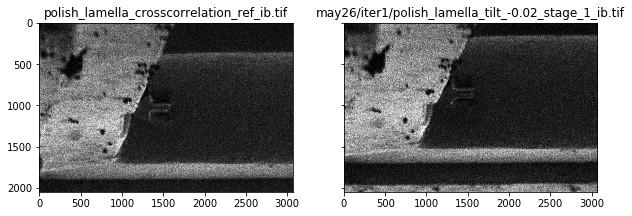

In [89]:

folder = "iter1"
filenames = [  
    f'may26/{folder}/polish_lamella_tilt_-0.02_stage_1_ib.tif',
    f'may26/{folder}/polish_lamella_tilt_-0.02_stage_2_ib.tif',
    f'may26/{folder}/polish_lamella_tilt_-0.02_stage_3_ib.tif',
    f'may26/{folder}/polish_lamella_tilt_-0.02_aligned_ib.tif',
    f'may26/{folder}/polish_lamella_tilt_0.02_stage_1_ib.tif',
    f'may26/{folder}/polish_lamella_tilt_0.02_stage_2_ib.tif',
    f'may26/{folder}/polish_lamella_tilt_0.02_stage_3_ib.tif',
    f'may26/{folder}/polish_lamella_tilt_0.02_aligned_ib.tif']

ref_fname = f'may26/{folder}\\polish_lamella_crosscorrelation_ref_ib.tif'
img2_fname = filenames[0]

# f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 10))

for i, fname in enumerate([ref_fname, img2_fname]):
    print(i, fname)
    adorned_img = AdornedImage.load(fname)
    
    img = ndi.median_filter(adorned_img.data, size=3)
    ax[i].imshow(img.data, cmap="gray")
    ax[i].set_title(fname.split("\\")[-1])
    
plt.show()





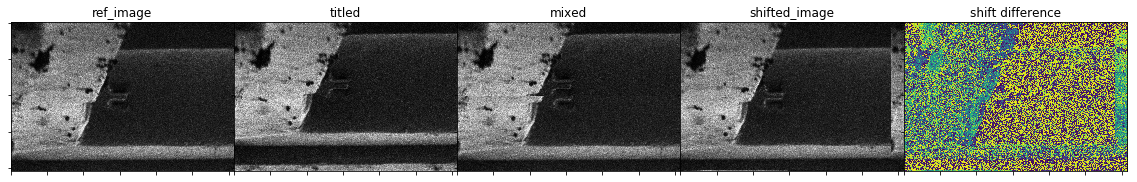

--------------------------------------------------
file: may26/iter1/polish_lamella_tilt_-0.02_stage_1_ib.tif
lp: 50, hp: 4, sigma: 5
dx: -1.46e-07, dy: -2.86e-06
dx_p: -10, dy_p: -176

----------------------------------------------------------------------------------------------------


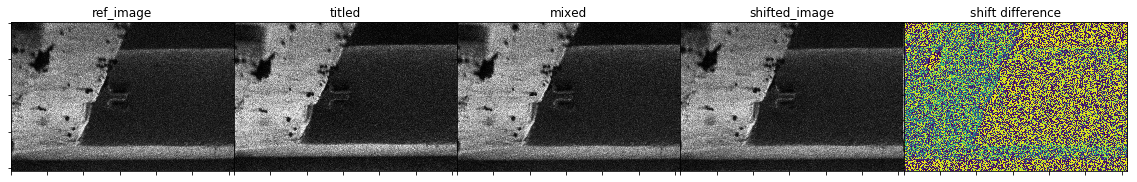

--------------------------------------------------
file: may26/iter1/polish_lamella_tilt_-0.02_stage_2_ib.tif
lp: 50, hp: 4, sigma: 5
dx: -9.77e-08, dy: -3.09e-07
dx_p: -6, dy_p: -19

----------------------------------------------------------------------------------------------------


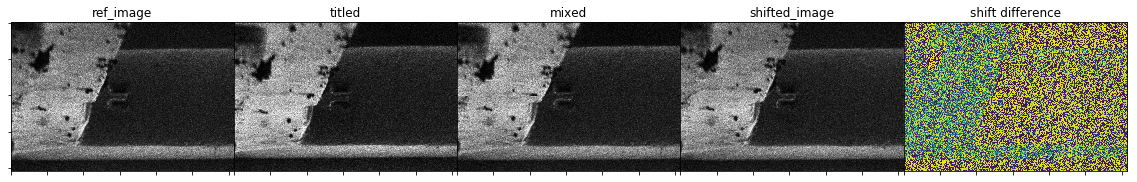

--------------------------------------------------
file: may26/iter1/polish_lamella_tilt_-0.02_stage_3_ib.tif
lp: 50, hp: 4, sigma: 5
dx: -1.63e-08, dy: -9.77e-08
dx_p: -1, dy_p: -6

----------------------------------------------------------------------------------------------------


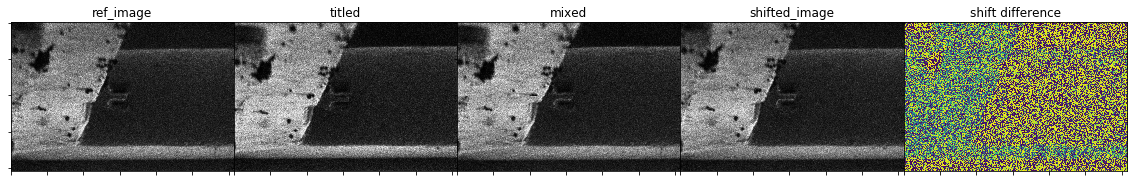

--------------------------------------------------
file: may26/iter1/polish_lamella_tilt_-0.02_aligned_ib.tif
lp: 50, hp: 4, sigma: 5
dx: 0.00e+00, dy: -4.88e-08
dx_p: 0, dy_p: -3

----------------------------------------------------------------------------------------------------


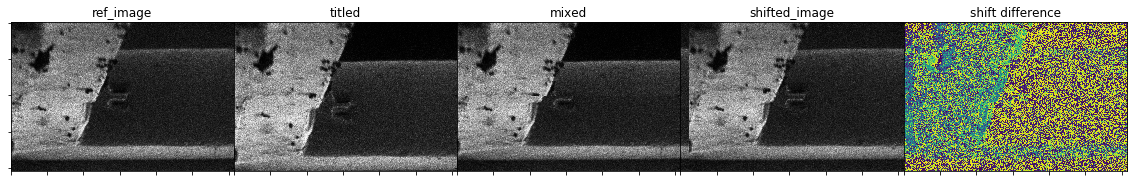

--------------------------------------------------
file: may26/iter1/polish_lamella_tilt_0.02_stage_1_ib.tif
lp: 50, hp: 4, sigma: 5
dx: 0.00e+00, dy: 1.97e-06
dx_p: 0, dy_p: 121

----------------------------------------------------------------------------------------------------


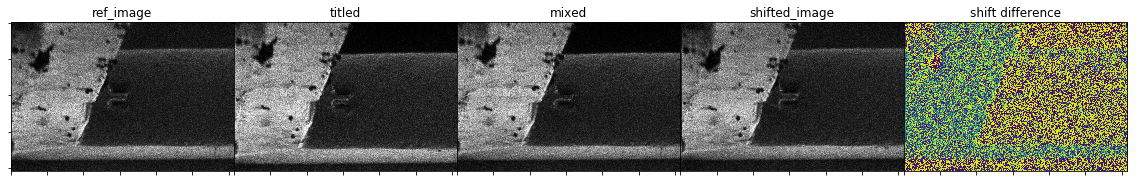

--------------------------------------------------
file: may26/iter1/polish_lamella_tilt_0.02_stage_2_ib.tif
lp: 50, hp: 4, sigma: 5
dx: -4.88e-08, dy: 4.39e-07
dx_p: -3, dy_p: 26

----------------------------------------------------------------------------------------------------


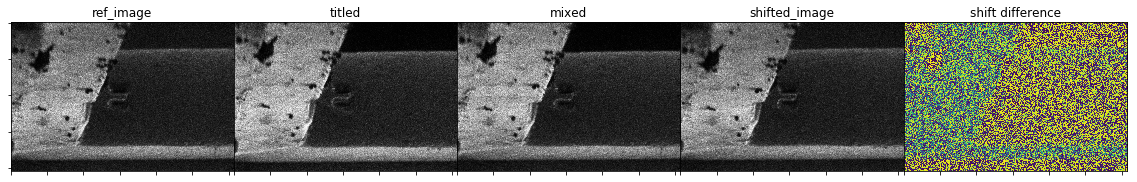

--------------------------------------------------
file: may26/iter1/polish_lamella_tilt_0.02_stage_3_ib.tif
lp: 50, hp: 4, sigma: 5
dx: -4.88e-08, dy: 1.30e-07
dx_p: -3, dy_p: 8

----------------------------------------------------------------------------------------------------


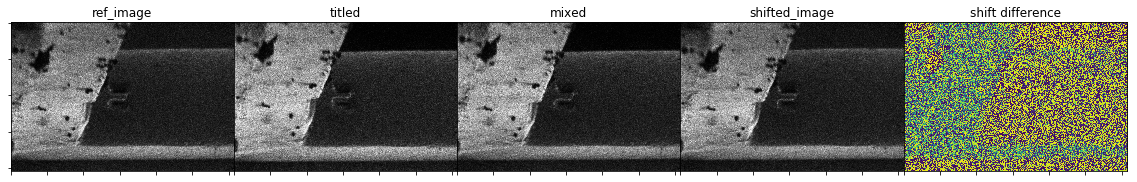

--------------------------------------------------
file: may26/iter1/polish_lamella_tilt_0.02_aligned_ib.tif
lp: 50, hp: 4, sigma: 5
dx: -3.26e-08, dy: 6.51e-08
dx_p: -2, dy_p: 4

----------------------------------------------------------------------------------------------------


In [88]:
from liftout.fibsem.calibration import  shift_from_crosscorrelation_AdornedImages

ref_img = AdornedImage.load(ref_fname)
tilted_images = [fname for fname in filenames if "ref" not in fname]
pixel_size = ref_img.metadata.binary_result.pixel_size.x


def cross_correlate_and_plot(ref_img, img2_fname, lp=50, hp=4, sigma=5):
    img2 = AdornedImage.load(img2_fname)
    
    dx, dy = shift_from_crosscorrelation_AdornedImages(ref_img, img2, lowpass=lp, highpass=hp, sigma=sigma, use_rect_mask=True)
    dx_p, dy_p =  int(dx // pixel_size), int(dy // pixel_size)     
    fig, ax = plt.subplots(1, 5, sharey=True, figsize=(20, 20))
    
    # vertical mix of images
    mix = np.zeros_like(ref_img.data)
    cy, cx = mix.shape[0]//2-1, mix.shape[1]//2-1 
    mix[cy:, :] = ref_img.data[cy:, :]
    mix[:cy, :] = img2.data[:cy, :]
    
    # shift image
    shift = np.roll(ref_img.data, dx_p, axis=0)
    shift = np.roll(shift, dy_p, axis=1)

    
    ax[0].imshow(ndi.median_filter(ref_img.data, size=3), cmap="gray")
    ax[0].set_title("ref_image")
    ax[1].imshow(ndi.median_filter(img2.data, size=3), cmap="gray")
    ax[1].set_title("titled")
    ax[2].imshow(ndi.median_filter(mix, size=3), cmap="gray")
    ax[2].set_title("mixed")
    ax[3].imshow(ndi.median_filter(shift, size=3), cmap="gray")
    ax[3].set_title("shifted_image")
    ax[4].imshow(np.abs(ref_img.data - shift))
    ax[4].set_title("shift difference")
    
    for a in ax:
        a.set_xticklabels([])
        a.set_yticklabels([])

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    
    #####
    print("-"*50)
    print(f"file: {img2_fname}")
    print(f"lp: {lp}, hp: {hp}, sigma: {sigma}")
    print(f"dx: {dx:.2e}, dy: {dy:.2e}")
    print(f"dx_p: {dx_p}, dy_p: {dy_p}")
    print("")

for img2_fname in tilted_images:
    for lp in [50]:
        cross_correlate_and_plot(ref_img, img2_fname, lp=lp, hp=4, sigma=5)
    print("-"*100)

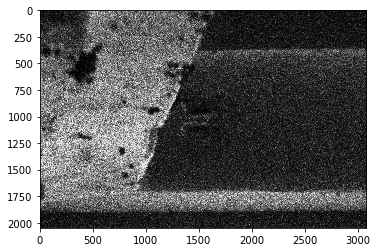

In [97]:
# select coord
# 
# 
from copy import deepcopy

ref_highlight = deepcopy(ref_img.data)

cx, cy = ref_highlight.data.shape[1] // 2, ref_highlight.data.shape[0] //2

ref_highlight[cy, cx] = 255

plt.imshow(ref_highlight, cmap="gray")
plt.show()

